In [1]:
#Step1: importing necessary libraries
import numpy as np
import pandas as pd
import statistics
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as py
import scipy.stats as stats

In [2]:
#Step2: Reading data as dataframe
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Step3 a: Shape of data
insurance_data.shape

(1338, 7)

In [4]:
#Step3 b: Checking datatype of each attribute
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Step3 c:Checking the presence of missing values
insurance_data.isnull().sum()

#As seen there are no missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Step3 d: 5 point summary of numerical attributes
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


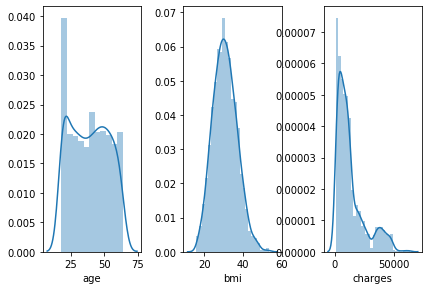

In [21]:
#Step3 e: Distriution of Age, BMI and Charges

f, axes = py.subplots(1, 3)
f.tight_layout()

sns.distplot(insurance_data['age'], ax=axes[0])

sns.distplot(insurance_data['bmi'], ax=axes[1])

sns.distplot(insurance_data['charges'], ax=axes[2])

In [8]:
#Step3 f: Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
insurance_data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

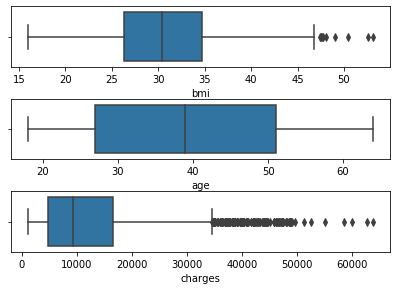

In [9]:
#Step3 g: Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

f, axes = py.subplots(3, 1)
f.tight_layout()

sns.boxplot(x=insurance_data['bmi'], ax=axes[0])

sns.boxplot(x=insurance_data['age'], ax=axes[1])

sns.boxplot(x=insurance_data['charges'], ax=axes[2])

#It is seen that BMI has few outliers, but charges has lot of extreme values

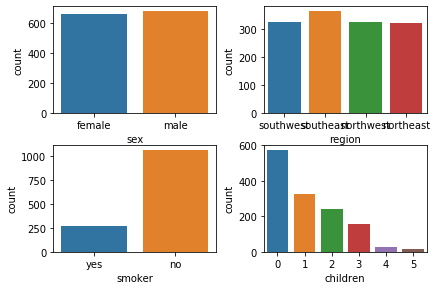

In [10]:
#Step3 h: Distribution of categorical columns (include children)

f, axes = py.subplots(2, 2)
f.tight_layout()

sns.countplot(insurance_data['sex'], ax=axes[0,0])

sns.countplot(insurance_data['smoker'], ax=axes[1,0])

sns.countplot(insurance_data['region'], ax=axes[0,1])

sns.countplot(insurance_data['children'], ax=axes[1,1])

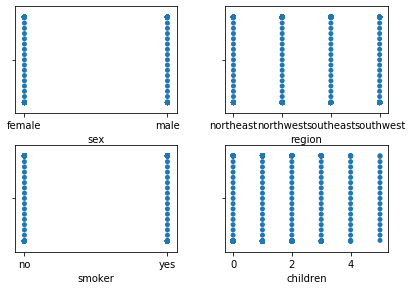

In [11]:
#Step3 h: Distribution of categorical columns (include children)

f, axes = py.subplots(2, 2)
f.tight_layout()

sns.swarmplot(insurance_data['sex'], ax=axes[0,0])

sns.swarmplot(insurance_data['smoker'], ax=axes[1,0])

sns.swarmplot(insurance_data['region'], ax=axes[0,1])

sns.swarmplot(insurance_data['children'], ax=axes[1,1])

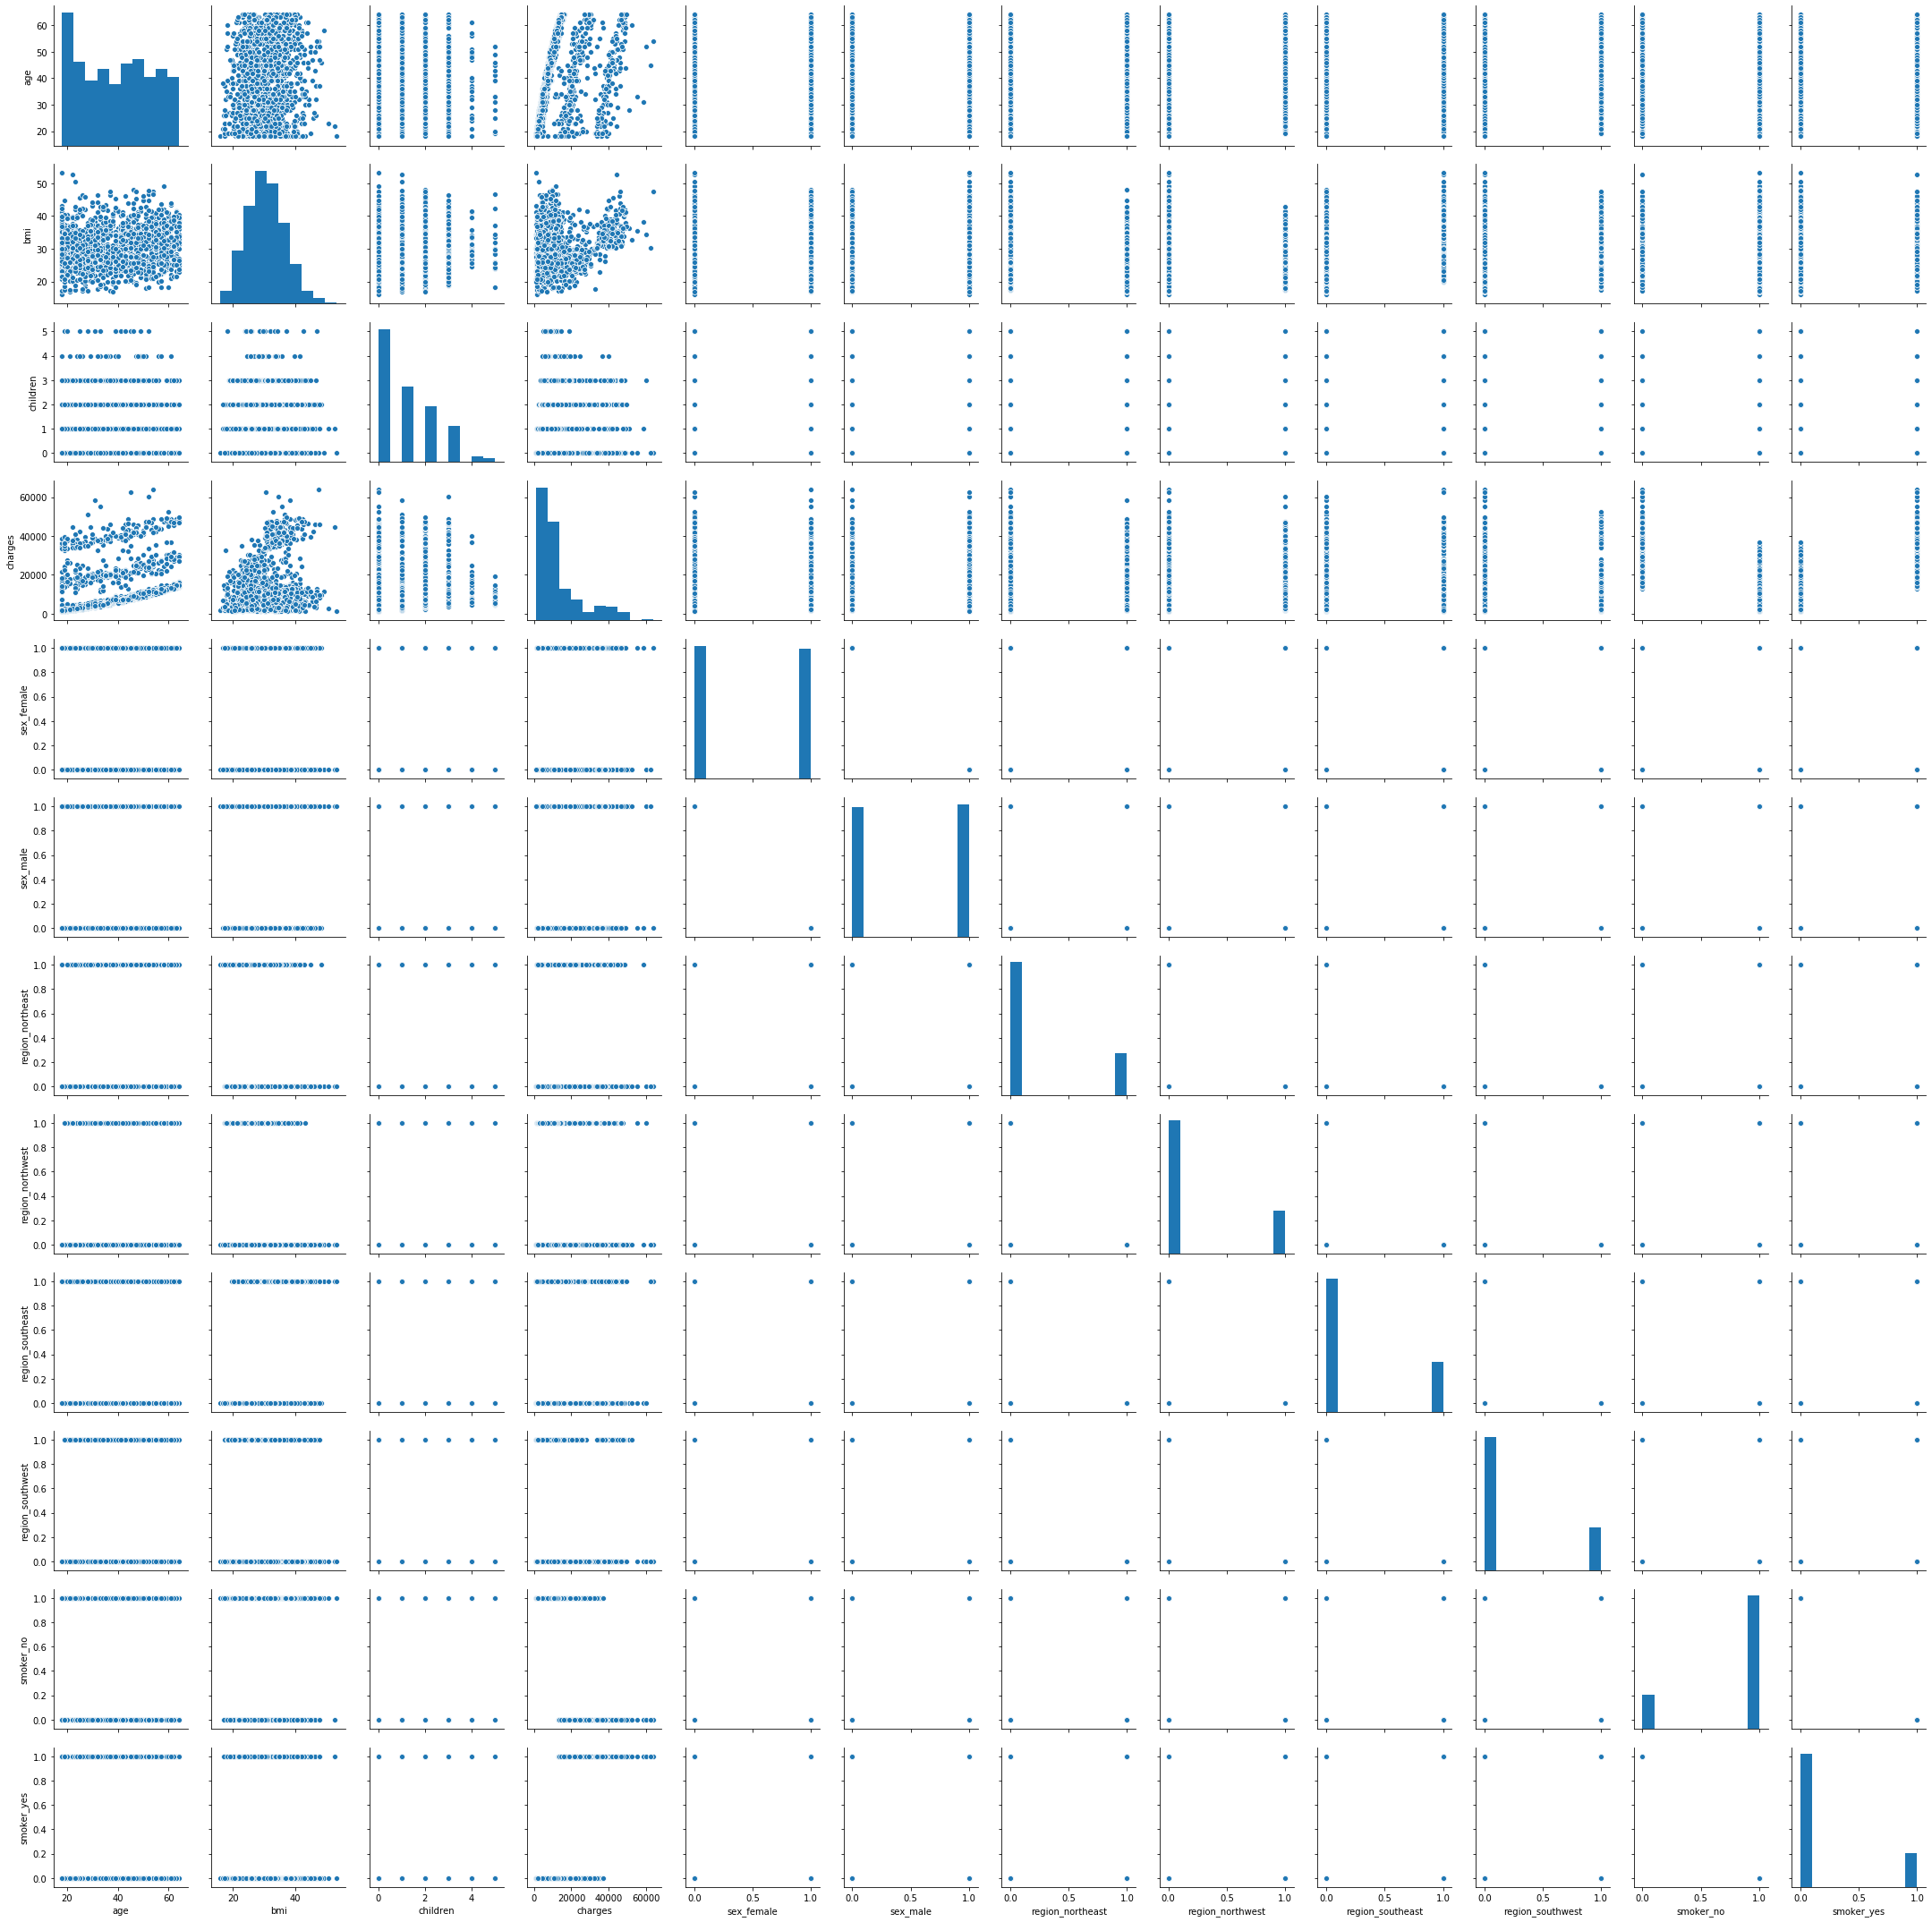

In [12]:
#Step3 i: Pair plot that includes all the columns of the data frame

insurance_copy=pd.get_dummies(insurance_data,columns=['sex','region','smoker'])

insurance_copy
sns.pairplot(insurance_copy,palette="husl")

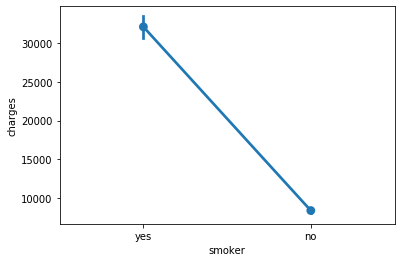

In [13]:
#Step4 a: Do charges of people who smoke differ significantly from the people who don't?


#Checking Distribution using Point Plot
sns.pointplot(y=insurance_data['charges'],x=insurance_data['smoker'])

In [14]:
#Checking Count of Smokers
insurance_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

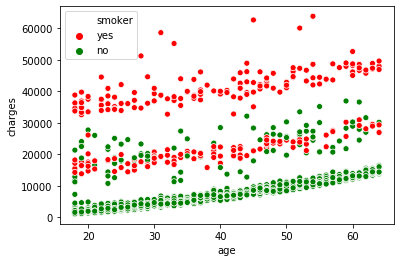

In [15]:
#Checking Variance between Charges and Smokers using Scatter Plot
sns.scatterplot(insurance_data.age, insurance_data.charges,hue=insurance_data.smoker,palette= ['red','green'])

In [16]:
#T-Test to check null hypothesis

Ho="Charges of smoker and non-smoker are same"
H1="Charges of smoker and non-smoker are not same"
x=np.array(insurance_data[insurance_data.smoker=='yes'].charges)
y=np.array(insurance_data[insurance_data.smoker=='no'].charges)
t,pvalue=stats.ttest_ind(x,y, axis = 0)

if pvalue<=0.05:
    print(H1 + " as p "+str(pvalue)+" is less than 0.05")
else:
  print(Ho + " as p "+str(pvalue)+" is more than  0.05")


#Test clearly shows, Charges of smoker and non-smoker are not same. 
#As seen by scatter plot above, charges of smoker are much higher than non-smoker

Charges of smoker and non-smoker are not same as p 8.271435842177219e-283 is less than 0.05


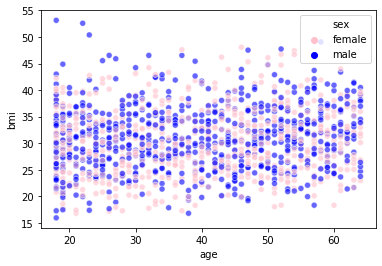

In [17]:
#Step4 b: Does bmi of males differ significantly from that of females?

#Scatter Plote to see Variation between BMI and gender
sns.scatterplot(insurance_data.age,insurance_data.bmi,hue=insurance_data.sex,palette= ['pink','blue'] ,alpha=0.6)

In [18]:
#T-Test to check null hypothesis

Ho="BMI is same for gender"
H1="BMI is different for gender"
x=np.array(insurance_data[insurance_data.sex=='male'].bmi)
y=np.array(insurance_data[insurance_data.sex=='female'].bmi)
t,pvalue=stats.ttest_ind(x,y,axis=0)

if pvalue<=0.05:
    print(H1 + " as p "+str(pvalue)+" is less than 0.05")
else:
  print(Ho + " as p "+str(pvalue)+" is more than  0.05")

# It is clearly seen through t-test and scatter plot, that gender / sex do not have any impact on bmi of individual 

BMI is same for gender as p 0.08997637178984932 is more than  0.05


In [19]:
# Step4 c: Is the proportion of smokers significantly different in different genders?

# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"
Ha = "Gender has an effect on smoking habits"

crosstab = pd.crosstab(insurance_data['sex'],insurance_data['smoker'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if pvalue<=0.05:
    print(H1 + " as p "+str(pvalue)+" is less than 0.05")
else:
  print(Ho + " as p "+str(pvalue)+" is more than  0.05")
crosstab

# It is clearly observed that gender do not have any effect on smoking habits

Gender has no effect on smoking habits as p 0.08997637178984932 is more than  0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [20]:
#Step4 d: Is the distribution of bmi across women with no children, one child and two children, the same?
 
Ho="No. of children has no impact on bmi"
H1="No. of children has impact on bmi"


female_df = insurance_data[insurance_data['sex'] == 'female']

female_with_zero_kid = female_df[female_df.children == 0]['bmi']
female_with_one_kid = female_df[female_df.children == 1]['bmi']
female_with_two_kid = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(female_with_zero_kid,female_with_one_kid,female_with_two_kid)


if pvalue<=0.05:
    print(H1 + " as p "+str(pvalue)+" is less than 0.05")
else:
  print(Ho + " as p "+str(pvalue)+" is more than  0.05")

#As clearly seen by Anova test, no. of children has no impact on BMI

No. of children has no impact on bmi as p 0.08997637178984932 is more than  0.05
